# 머신러닝 모델 적용

In [1]:
# 필요라이브러리
import FinanceDataReader as fdr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import talib
import scipy.stats as stats
import math
from sklearn.preprocessing import MinMaxScaler

In [2]:
# 경고 문구 삭제
import warnings
warnings.filterwarnings(action='ignore')

In [3]:
# matplotlib 한글 사용
import matplotlib as mpl
import matplotlib.font_manager as fm

mpl.rcParams['axes.unicode_minus']= False

path = 'C:/Windows/Fonts/malgun.ttf'
font_name = fm.FontProperties(fname = path, size = 50).get_name()
plt.rc('font', family=font_name)

In [4]:
df = pd.read_csv('../전처리 데이터/old+new감성어.csv', index_col='Date')
df.drop('Unnamed: 0',axis=1,inplace=True)
df

Close     Open     High      Low        Volume  Change  \
Date                                                                   
2017-01-06  2049.12  2048.11  2051.84  2045.66  4.553500e+08  0.0035   
2017-01-09  2048.78  2053.18  2053.18  2046.47  3.982900e+08 -0.0002   
2017-01-10  2045.12  2043.30  2046.78  2039.50  5.126600e+08 -0.0018   
2017-01-11  2075.17  2048.08  2079.70  2047.56  3.355300e+08  0.0147   
2017-01-12  2087.14  2077.69  2087.14  2073.89  5.558400e+08  0.0058   
...             ...      ...      ...      ...           ...     ...   
2020-12-23  2759.82  2737.74  2769.08  2716.28  1.120000e+09  0.0096   
2020-12-24  2806.86  2762.60  2812.16  2762.60  1.030000e+09  0.0170   
2020-12-28  2808.60  2820.95  2834.59  2799.56  1.010000e+09  0.0006   
2020-12-29  2820.51  2810.55  2823.44  2792.06  1.050000e+09  0.0042   
2020-12-30  2873.47  2820.36  2878.21  2809.35  1.070000e+09  0.0188   

                  점수      긍정개수      부정개수      중립개수  ...   new중립개수   new긍정비율  \
Date                                                ...                       
2017-01-06  0.419847  0.068182  0.096774  0.414523  ...  0.261968  0.618678   
2017-01-09  0.473282  0.090909  0.064516  0.558506  ...  0.368351  0.538132   
2017-01-10  0.320611  0.045455  0.322581  0.497925  ...  0.261303  0.565195   
2017-01-11  0.442748  0.022727  0.000000  0.442324  ...  0.253324  0.661121   
2017-01-12  0.396947  0.022727  0.129032  0.460581  ...  0.282580  0.585610   
...              ...       ...       ...       ...  ...       ...       ...   
2020-12-23  0.458015  0.090909  0.064516  0.417427  ...  0.264628  0.635444   
2020-12-24  0.458015  0.090909  0.032258  0.348963  ...  0.189495  0.756275   
2020-12-28  0.488550  0.113636  0.064516  0.502075  ...  0.296543  0.663548   
2020-12-29  0.419847  0.045455  0.064516  0.357676  ...  0.213431  0.697984   
2020-12-30  0.480916  0.090909  0.000000  0.388382  ...  0.261968  0.591647   

             new부정비율   new중립비율  new종가-시가  new종가-시가증감  new비율점수  new감성어_Change  \
Date                                                                           
2017-01-06  0.143331  0.328544  0.665253           1      1.0       0.540019   
2017-01-09  0.209910  0.351556  0.644015           0      1.0       0.538817   
2017-01-10  0.335201  0.217324  0.668433           1      1.0       0.531228   
2017-01-11  0.159542  0.272475  0.767636           1      1.0       0.546626   
2017-01-12  0.204081  0.309364  0.698387           1      1.0       0.535001   
...              ...       ...       ...         ...      ...            ...   
2020-12-23  0.121786  0.330339  0.747968           1      1.0       0.552050   
2020-12-24  0.077791  0.247944  0.835041           1      1.0       0.540726   
2020-12-28  0.142933  0.284291  0.612806           0      1.0       0.541265   
2020-12-29  0.085821  0.298995  0.700389           1      1.0       0.535012   
2020-12-30  0.124046  0.371930  0.869784           1      1.0       0.535559   

            new감성어5일_Change  new감성어5일이동평균  
Date                                       
2017-01-06         0.166702         292.6  
2017-01-09         0.165351         310.0  
2017-01-10         0.164463         292.2  
2017-01-11         0.166410         262.4  
2017-01-12         0.165834         273.2  
...                     ...           ...  
2020-12-23         0.167093         213.8  
2020-12-24         0.166678         243.4  
2020-12-28         0.166602         262.8  
2020-12-29         0.167693         281.8  
2020-12-30         0.165610         328.6  

[977 rows x 32 columns]

In [5]:
# 이동 평균
df['증권감성_MA5'] = talib.SMA(df['new점수'],timeperiod=5)
df['증권감성_MA10'] = talib.SMA(df['new점수'],timeperiod=10)
df['일반감성_MA5'] = talib.SMA(df['점수'],timeperiod=5)
df['일반감성_MA10'] = talib.SMA(df['점수'],timeperiod=10)
df['MA5'] = talib.SMA(df['Close'],timeperiod=5)
df['MA10'] = talib.SMA(df['Close'],timeperiod=10)

In [6]:
# MACD(Moving Average Convergence & Divergence) 지표
macd, macdsignal, macdhist = talib.MACD(df['Close'],fastperiod=12, slowperiod=26,signalperiod=9)
df['MACD'] = macd
macd, macdsignal, macdhist = talib.MACD(df['new점수'],fastperiod=12, slowperiod=26,signalperiod=9)
df['증권감성_MACD'] = macd
macd, macdsignal, macdhist = talib.MACD(df['점수'],fastperiod=12, slowperiod=26,signalperiod=9)
df['일반감성_MACD'] = macd

In [7]:
# 보조지표 생성으로 발생한 nan값 드랍처리
kospi_df = df.dropna()
kospi_df

Close     Open     High      Low        Volume  Change  \
Date                                                                   
2017-02-24  2094.12  2106.43  2107.83  2090.05  3.854000e+08 -0.0064   
2017-02-27  2085.52  2095.47  2097.24  2084.08  3.437000e+08 -0.0041   
2017-02-28  2091.64  2087.26  2094.41  2084.36  3.998200e+08  0.0029   
2017-03-02  2102.65  2105.19  2112.58  2096.31  4.347100e+08  0.0053   
2017-03-03  2078.75  2090.92  2091.59  2072.09  4.259400e+08 -0.0114   
...             ...      ...      ...      ...           ...     ...   
2020-12-23  2759.82  2737.74  2769.08  2716.28  1.120000e+09  0.0096   
2020-12-24  2806.86  2762.60  2812.16  2762.60  1.030000e+09  0.0170   
2020-12-28  2808.60  2820.95  2834.59  2799.56  1.010000e+09  0.0006   
2020-12-29  2820.51  2810.55  2823.44  2792.06  1.050000e+09  0.0042   
2020-12-30  2873.47  2820.36  2878.21  2809.35  1.070000e+09  0.0188   

                  점수      긍정개수      부정개수      중립개수  ...  new감성어5일이동평균  \
Date                                                ...                 
2017-02-24  0.427481  0.090909  0.096774  0.453112  ...         334.4   
2017-02-27  0.435115  0.045455  0.032258  0.641494  ...         275.2   
2017-02-28  0.442748  0.022727  0.000000  0.527801  ...         240.8   
2017-03-02  0.435115  0.045455  0.032258  0.657261  ...         214.2   
2017-03-03  0.450382  0.090909  0.032258  0.485477  ...         213.2   
...              ...       ...       ...       ...  ...           ...   
2020-12-23  0.458015  0.090909  0.064516  0.417427  ...         213.8   
2020-12-24  0.458015  0.090909  0.032258  0.348963  ...         243.4   
2020-12-28  0.488550  0.113636  0.064516  0.502075  ...         262.8   
2020-12-29  0.419847  0.045455  0.064516  0.357676  ...         281.8   
2020-12-30  0.480916  0.090909  0.000000  0.388382  ...         328.6   

            증권감성_MA5  증권감성_MA10  일반감성_MA5  일반감성_MA10       MA5      MA10  \
Date                                                                       
2017-02-24  0.555619   0.557326  0.424427   0.451908  2099.136  2089.518   
2017-02-27  0.537127   0.546610  0.418321   0.439695  2099.362  2090.205   
2017-02-28  0.525462   0.541963  0.424427   0.437405  2097.104  2091.912   
2017-03-02  0.520152   0.537269  0.424427   0.432824  2096.312  2093.791   
2017-03-03  0.477383   0.518208  0.438168   0.433588  2090.536  2093.482   
...              ...        ...       ...        ...       ...       ...   
2020-12-23  0.520816   0.535799  0.448855   0.454962  2762.952  2762.209   
2020-12-24  0.537790   0.543101  0.444275   0.454962  2770.238  2768.249   
2020-12-28  0.551351   0.545614  0.448855   0.461069  2777.522  2772.103   
2020-12-29  0.553343   0.546230  0.458015   0.461069  2785.894  2777.934   
2020-12-30  0.570318   0.548317  0.461069   0.459542  2813.852  2789.599   

                 MACD  증권감성_MACD  일반감성_MACD  
Date                                         
2017-02-24   8.965373   0.002830  -0.002773  
2017-02-27   7.949267  -0.001637  -0.002978  
2017-02-28   7.550788  -0.003264  -0.002495  
2017-03-02   8.030832  -0.001589  -0.002698  
2017-03-03   6.408862  -0.017129  -0.001608  
...               ...        ...        ...  
2020-12-23  61.691787  -0.003256  -0.002346  
2020-12-24  62.111568   0.000314  -0.001655  
2020-12-28  61.871436   0.004847   0.001341  
2020-12-29  61.928296   0.005545  -0.001808  
2020-12-30  65.491839   0.003947   0.000617  

[944 rows x 41 columns]

In [8]:
# 특정 열 정규화 (y값 제외, x값 항목 정규화)
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_values = scaler.fit_transform(kospi_df.iloc[:,:15])

kospi_df.iloc[:,:15] = scaled_values

In [9]:
kospi_df.iloc[:,:15]

Close      Open      High       Low    Volume    Change  \
Date                                                                     
2017-02-24  0.449545  0.469350  0.434152  0.474933  0.112044  0.456151   
2017-02-27  0.443471  0.461211  0.426373  0.470575  0.088823  0.469688   
2017-02-28  0.447794  0.455113  0.424295  0.470779  0.120074  0.510889   
2017-03-02  0.455570  0.468429  0.437640  0.479502  0.139503  0.525015   
2017-03-03  0.438690  0.457831  0.422223  0.461823  0.134619  0.426722   
...              ...       ...       ...       ...       ...       ...   
2020-12-23  0.919729  0.938203  0.919843  0.932062  0.521107  0.550324   
2020-12-24  0.952953  0.956665  0.951486  0.965874  0.470991  0.593879   
2020-12-28  0.954182  1.000000  0.967961  0.992854  0.459854  0.497351   
2020-12-29  0.962594  0.992276  0.959771  0.987379  0.482128  0.518540   
2020-12-30  1.000000  0.999562  1.000000  1.000000  0.493265  0.604473   

                  점수      긍정개수      부정개수      중립개수      긍정비율      부정비율  \
Date                                                                     
2017-02-24  0.427481  0.090909  0.096774  0.453112  0.109328  0.110610   
2017-02-27  0.435115  0.045455  0.032258  0.641494  0.039908  0.026917   
2017-02-28  0.442748  0.022727  0.000000  0.527801  0.023913  0.000000   
2017-03-02  0.435115  0.045455  0.032258  0.657261  0.039018  0.026317   
2017-03-03  0.450382  0.090909  0.032258  0.485477  0.102902  0.034703   
...              ...       ...       ...       ...       ...       ...   
2020-12-23  0.458015  0.090909  0.064516  0.417427  0.117746  0.079418   
2020-12-24  0.458015  0.090909  0.032258  0.348963  0.138021  0.046547   
2020-12-28  0.488550  0.113636  0.064516  0.502075  0.124581  0.067222   
2020-12-29  0.419847  0.045455  0.064516  0.357676  0.067608  0.091201   
2020-12-30  0.480916  0.090909  0.000000  0.388382  0.125759  0.000000   

                중립비율     종가-시가  종가-시가증감  
Date                                     
2017-02-24  0.810189  0.612963      0.0  
2017-02-27  0.940612  0.622227      0.0  
2017-02-28  0.976276  0.678483      1.0  
2017-03-02  0.941935  0.651317      0.0  
2017-03-03  0.872390  0.613512      0.0  
...              ...       ...      ...  
2020-12-23  0.824779  0.747968      1.0  
2020-12-24  0.828838  0.835041      1.0  
2020-12-28  0.826966  0.612806      0.0  
2020-12-29  0.865854  0.700389      1.0  
2020-12-30  0.875236  0.869784      1.0  

[944 rows x 15 columns]

In [10]:
kospi_df.iloc[:,16:]

감성어_Change  감성어5일_Change  감성어5일이동평균     new점수   new긍정개수   new부정개수  \
Date                                                                            
2017-02-24    0.288889      0.406780       -1.2  0.452821  0.265292  0.217577   
2017-02-27    0.422222      0.322034       -2.2  0.500711  0.376956  0.265358   
2017-02-28    0.444444      0.338983       -1.6  0.523945  0.328592  0.165529   
2017-03-02    0.422222      0.322034       -1.4  0.560455  0.442390  0.236348   
2017-03-03    0.444444      0.347458        0.0  0.348981  0.225462  0.356655   
...                ...           ...        ...       ...       ...       ...   
2020-12-23    0.414815      0.305085        1.2  0.564723  0.343528  0.110068   
2020-12-24    0.422222      0.316384        0.6  0.579422  0.335704  0.074232   
2020-12-28    0.434921      0.358354        0.4  0.601233  0.426743  0.144198   
2020-12-29    0.522222      0.372881        3.4  0.566145  0.320057  0.079352   
2020-12-30    0.451852      0.330508        2.2  0.540066  0.300853  0.103242   

             new중립개수   new긍정비율   new부정비율   new중립비율  ...  new감성어5일이동평균  \
Date                                                ...                 
2017-02-24  0.311835  0.418458  0.313892  0.381412  ...         334.4   
2017-02-27  0.469415  0.421413  0.260392  0.424308  ...         275.2   
2017-02-28  0.408910  0.455499  0.168210  0.469404  ...         240.8   
2017-03-02  0.456117  0.502586  0.210954  0.385989  ...         214.2   
2017-03-03  0.291223  0.307181  0.543839  0.295009  ...         213.2   
...              ...       ...       ...       ...  ...           ...   
2020-12-23  0.264628  0.635444  0.121786  0.330339  ...         213.8   
2020-12-24  0.189495  0.756275  0.077791  0.247944  ...         243.4   
2020-12-28  0.296543  0.663548  0.142933  0.284291  ...         262.8   
2020-12-29  0.213431  0.697984  0.085821  0.298995  ...         281.8   
2020-12-30  0.261968  0.591647  0.124046  0.371930  ...         328.6   

            증권감성_MA5  증권감성_MA10  일반감성_MA5  일반감성_MA10       MA5      MA10  \
Date                                                                       
2017-02-24  0.555619   0.557326  0.424427   0.451908  2099.136  2089.518   
2017-02-27  0.537127   0.546610  0.418321   0.439695  2099.362  2090.205   
2017-02-28  0.525462   0.541963  0.424427   0.437405  2097.104  2091.912   
2017-03-02  0.520152   0.537269  0.424427   0.432824  2096.312  2093.791   
2017-03-03  0.477383   0.518208  0.438168   0.433588  2090.536  2093.482   
...              ...        ...       ...        ...       ...       ...   
2020-12-23  0.520816   0.535799  0.448855   0.454962  2762.952  2762.209   
2020-12-24  0.537790   0.543101  0.444275   0.454962  2770.238  2768.249   
2020-12-28  0.551351   0.545614  0.448855   0.461069  2777.522  2772.103   
2020-12-29  0.553343   0.546230  0.458015   0.461069  2785.894  2777.934   
2020-12-30  0.570318   0.548317  0.461069   0.459542  2813.852  2789.599   

                 MACD  증권감성_MACD  일반감성_MACD  
Date                                         
2017-02-24   8.965373   0.002830  -0.002773  
2017-02-27   7.949267  -0.001637  -0.002978  
2017-02-28   7.550788  -0.003264  -0.002495  
2017-03-02   8.030832  -0.001589  -0.002698  
2017-03-03   6.408862  -0.017129  -0.001608  
...               ...        ...        ...  
2020-12-23  61.691787  -0.003256  -0.002346  
2020-12-24  62.111568   0.000314  -0.001655  
2020-12-28  61.871436   0.004847   0.001341  
2020-12-29  61.928296   0.005545  -0.001808  
2020-12-30  65.491839   0.003947   0.000617  

[944 rows x 25 columns]

In [11]:
scaler = MinMaxScaler()
scaled_values = scaler.fit_transform(kospi_df.iloc[:,16:])

kospi_df.iloc[:,16:] = scaled_values

# X, Y 피쳐 설정

In [12]:
# 기술 + 일반 + 증권
x = kospi_df[['Close','Open','High','Low','Volume','Change','MA5','MA10','MACD',
              '점수','긍정개수','부정개수','중립개수','긍정비율','부정비율','중립비율','비율점수',
              '감성어_Change','감성어5일_Change','일반감성_MA5','일반감성_MA10','일반감성_MACD',
              'new점수','new긍정개수','new부정개수','new중립개수','new긍정비율','new부정비율','new중립비율',
              '증권감성_MA5','증권감성_MA10','증권감성_MACD',
               'new감성어_Change','new감성어5일_Change','new비율점수']]
# 기술 + 일반
# x = kospi_df[['Close','Open','High','Low','Volume','Change','MA5','MA10','MACD',
#               '점수','긍정개수','부정개수','중립개수','긍정비율','부정비율','중립비율','비율점수',
#               '감성어_Change','감성어5일_Change','일반감성_MA5','일반감성_MA10','일반감성_MACD']]
# 기술 + 증권
# x = kospi_df[['Close','Open','High','Low','Volume','Change','MA5','MA10','MACD',
#               'new점수','new긍정비율','new부정비율','new중립비율',
#               '증권감성_MA5','증권감성_MA10','증권감성_MACD',
#                'new감성어_Change','new감성어5일_Change','new비율점수']]
# 기술
# x = kospi_df[['Close','Open','High','Low','Volume','Change','MA5','MA10','MACD']]
# 증권+일반
# x = kospi_df[['점수','긍정비율','부정비율','중립비율','비율점수',
#               '감성어_Change','감성어5일_Change',
#               'new점수','new긍정비율','new부정비율','new중립비율',
#                'new감성어_Change','new감성어5일_Change','new비율점수']]

# 증권
# x = kospi_df[['new점수','new긍정비율','new부정비율',
#               'new중립비율','new감성어_Change','new감성어5일_Change','new비율점수']]
# 일반
# x = kospi_df[['점수','긍정비율','부정비율','중립비율','비율점수',
#               '감성어_Change','감성어5일_Change']]

y = kospi_df['종가-시가증감']

# 데이터 분리

In [13]:
#train 데이터와 test 데이터 분리과정 

train_test_split=600
x_train = x.iloc[:train_test_split-1, :]
y_train = y.iloc[1:train_test_split]

x_test = x.iloc[train_test_split-1:-1, :]
y_test = y.iloc[train_test_split:]

In [14]:
x_train

Close      Open      High       Low    Volume    Change  \
Date                                                                     
2017-02-24  0.449545  0.469350  0.434152  0.474933  0.112044  0.456151   
2017-02-27  0.443471  0.461211  0.426373  0.470575  0.088823  0.469688   
2017-02-28  0.447794  0.455113  0.424295  0.470779  0.120074  0.510889   
2017-03-02  0.455570  0.468429  0.437640  0.479502  0.139503  0.525015   
2017-03-03  0.438690  0.457831  0.422223  0.461823  0.134619  0.426722   
...              ...       ...       ...       ...       ...       ...   
2019-08-01  0.395316  0.401515  0.378623  0.416010  0.154554  0.472631   
2019-08-02  0.381748  0.386825  0.358850  0.399797  0.141635  0.437905   
2019-08-05  0.345621  0.379859  0.345871  0.369335  0.253596  0.343143   
2019-08-06  0.324799  0.316309  0.317145  0.330224  0.309275  0.404944   
2019-08-07  0.319297  0.334853  0.303013  0.337377  0.321075  0.469688   

                 MA5      MA10      MACD        점수  ...   new중립개수   new긍정비율  \
Date                                                ...                       
2017-02-24  0.438279  0.401258  0.703405  0.427481  ...  0.311835  0.418458   
2017-02-27  0.438456  0.401846  0.699215  0.435115  ...  0.469415  0.421413   
2017-02-28  0.436682  0.403306  0.697572  0.442748  ...  0.408910  0.455499   
2017-03-02  0.436059  0.404913  0.699552  0.435115  ...  0.456117  0.502586   
2017-03-03  0.431520  0.404649  0.692864  0.450382  ...  0.291223  0.307181   
...              ...       ...       ...       ...  ...       ...       ...   
2019-08-01  0.388078  0.377915  0.595066  0.427481  ...  0.507314  0.404783   
2019-08-02  0.377369  0.369685  0.581553  0.480916  ...  0.301197  0.311590   
2019-08-05  0.364401  0.357168  0.555109  0.412214  ...  0.449468  0.351918   
2019-08-06  0.345353  0.341436  0.525963  0.412214  ...  0.553856  0.302376   
2019-08-07  0.327302  0.326675  0.502166  0.610687  ...  0.521941  0.435148   

             new부정비율   new중립비율  증권감성_MA5  증권감성_MA10  증권감성_MACD  new감성어_Change  \
Date                                                                            
2017-02-24  0.313892  0.381412  0.544713   0.440578   0.609942       0.505290   
2017-02-27  0.260392  0.424308  0.512892   0.414012   0.580575       0.547851   
2017-02-28  0.168210  0.469404  0.492820   0.402492   0.569876       0.542658   
2017-03-02  0.210954  0.385989  0.483681   0.390855   0.580887       0.543534   
2017-03-03  0.543839  0.295009  0.410085   0.343599   0.478717       0.671907   
...              ...       ...       ...        ...        ...            ...   
2019-08-01  0.369094  0.347711  0.436031   0.331492   0.475437       0.533195   
2019-08-02  0.591068  0.250166  0.397030   0.260844   0.389711       0.593990   
2019-08-05  0.456848  0.325072  0.407148   0.228400   0.357672       0.662146   
2019-08-06  0.413642  0.411323  0.298792   0.188786   0.332249       0.515736   
2019-08-07  0.304626  0.372762  0.306625   0.191254   0.378451       0.559668   

            new감성어5일_Change  new비율점수  
Date                                  
2017-02-24         0.160545      1.0  
2017-02-27         0.164146      1.0  
2017-02-28         0.164817      1.0  
2017-03-02         0.166002      1.0  
2017-03-03         0.174337      0.0  
...                     ...      ...  
2019-08-01         0.166681      1.0  
2019-08-02         0.167791      0.0  
2019-08-05         0.088696      1.0  
2019-08-06         0.114944      1.0  
2019-08-07         0.167017      1.0  

[599 rows x 35 columns]

In [15]:
x_test

Close      Open      High       Low    Volume    Change  \
Date                                                                     
2019-08-08  0.326995  0.335559  0.309374  0.347743  0.330196  0.527369   
2019-08-09  0.339101  0.345793  0.315977  0.362583  0.261804  0.546204   
2019-08-12  0.342308  0.346885  0.317630  0.360474  0.135287  0.507357   
2019-08-13  0.330682  0.337401  0.309175  0.353415  0.264978  0.443790   
2019-08-14  0.339539  0.350338  0.319855  0.363379  0.287001  0.532078   
...              ...       ...       ...       ...       ...       ...   
2020-12-22  0.901266  0.963669  0.923619  0.944734  0.599067  0.398470   
2020-12-23  0.919729  0.938203  0.919843  0.932062  0.521107  0.550324   
2020-12-24  0.952953  0.956665  0.951486  0.965874  0.470991  0.593879   
2020-12-28  0.954182  1.000000  0.967961  0.992854  0.459854  0.497351   
2020-12-29  0.962594  0.992276  0.959771  0.987379  0.482128  0.518540   

                 MA5      MA10      MACD        점수  ...   new중립개수   new긍정비율  \
Date                                                ...                       
2019-08-08  0.312097  0.313515  0.488979  0.435115  ...  0.390957  0.634602   
2019-08-09  0.302606  0.302525  0.486307  0.473282  ...  0.351729  0.603855   
2019-08-12  0.301869  0.295068  0.487760  0.465649  ...  0.377660  0.580381   
2019-08-13  0.303178  0.285416  0.485521  0.427481  ...  0.325798  0.437484   
2019-08-14  0.307683  0.278046  0.489953  0.496183  ...  0.380984  0.474966   
...              ...       ...       ...       ...  ...       ...       ...   
2020-12-22  0.961877  0.976203  0.934655  0.465649  ...  0.279920  0.428454   
2020-12-23  0.959996  0.976575  0.920816  0.458015  ...  0.264628  0.635444   
2020-12-24  0.965722  0.981740  0.922547  0.458015  ...  0.189495  0.756275   
2020-12-28  0.971447  0.985037  0.921556  0.488550  ...  0.296543  0.663548   
2020-12-29  0.978027  0.990024  0.921791  0.419847  ...  0.213431  0.697984   

             new부정비율   new중립비율  증권감성_MA5  증권감성_MA10  증권감성_MACD  new감성어_Change  \
Date                                                                            
2019-08-08  0.281966  0.193951  0.362761   0.226990   0.479000       0.549506   
2019-08-09  0.255580  0.247113  0.449086   0.261079   0.535680       0.534323   
2019-08-12  0.303876  0.229067  0.509628   0.311978   0.574256       0.537707   
2019-08-13  0.424473  0.267769  0.526599   0.246150   0.535289       0.487115   
2019-08-14  0.447525  0.210770  0.510117   0.239920   0.517584       0.545526   
...              ...       ...       ...        ...        ...            ...   
2020-12-22  0.287001  0.394515  0.494289   0.391795   0.550125       0.509082   
2020-12-23  0.121786  0.330339  0.484824   0.387211   0.569930       0.552050   
2020-12-24  0.077791  0.247944  0.514034   0.405313   0.593401       0.540726   
2020-12-28  0.142933  0.284291  0.537369   0.411543   0.623206       0.541265   
2020-12-29  0.085821  0.298995  0.540796   0.413072   0.627791       0.535012   

            new감성어5일_Change  new비율점수  
Date                                  
2019-08-08         0.169346      1.0  
2019-08-09         0.168618      1.0  
2019-08-12         0.168691      1.0  
2019-08-13         0.162480      1.0  
2019-08-14         0.160216      1.0  
...                     ...      ...  
2020-12-22         0.160851      1.0  
2020-12-23         0.167093      1.0  
2020-12-24         0.166678      1.0  
2020-12-28         0.166602      1.0  
2020-12-29         0.167693      1.0  

[344 rows x 35 columns]

In [16]:
y_train

Date
2017-02-27    0.0
2017-02-28    1.0
2017-03-02    0.0
2017-03-03    0.0
2017-03-06    1.0
             ... 
2019-08-02    1.0
2019-08-05    0.0
2019-08-06    1.0
2019-08-07    0.0
2019-08-08    0.0
Name: 종가-시가증감, Length: 599, dtype: float64

In [17]:
y_test

Date
2019-08-09    0.0
2019-08-12    1.0
2019-08-13    0.0
2019-08-14    0.0
2019-08-16    1.0
             ... 
2020-12-23    1.0
2020-12-24    1.0
2020-12-28    0.0
2020-12-29    1.0
2020-12-30    1.0
Name: 종가-시가증감, Length: 344, dtype: float64

# 분류모델 적용

In [18]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, \
recall_score, f1_score, classification_report
from sklearn.metrics import roc_auc_score

def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    roc_auc = roc_auc_score(y_test, pred_proba)
    
    print('오차행렬')
    print(confusion)
    print(classification_report(y_test, pred))
    print('정확도 :', round(accuracy, 2), '정밀도 :', round(precision, 2), '재현율 :', round(recall, 2), 
         'F1 :', round(f1,2), 'AUC :', round(roc_auc, 2))

# Decision Tree

In [19]:
# 1
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
tree = DecisionTreeClassifier()
tree.fit(x_train, y_train)
tree_pred = tree.predict(x_test)
tree_pred_proba = tree.predict_proba(x_test)[:, 1]

get_clf_eval(y_test, tree_pred, tree_pred_proba)

오차행렬
[[ 96  68]
 [109  71]]
              precision    recall  f1-score   support

         0.0       0.47      0.59      0.52       164
         1.0       0.51      0.39      0.45       180

    accuracy                           0.49       344
   macro avg       0.49      0.49      0.48       344
weighted avg       0.49      0.49      0.48       344

정확도 : 0.49 정밀도 : 0.51 재현율 : 0.39 F1 : 0.45 AUC : 0.49


# Random Forest

In [20]:
# 2
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
rfc_pred = rfc.predict(x_test)
rfc_pred_proba = rfc.predict_proba(x_test)[:, 1]

get_clf_eval(y_test, rfc_pred, rfc_pred_proba)

오차행렬
[[139  25]
 [147  33]]
              precision    recall  f1-score   support

         0.0       0.49      0.85      0.62       164
         1.0       0.57      0.18      0.28       180

    accuracy                           0.50       344
   macro avg       0.53      0.52      0.45       344
weighted avg       0.53      0.50      0.44       344

정확도 : 0.5 정밀도 : 0.57 재현율 : 0.18 F1 : 0.28 AUC : 0.5


In [21]:
# 3
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(x_train, y_train)
lr_pred = lr.predict(x_test)
lr_pred_proba = lr.predict_proba(x_test)[:, 1]

get_clf_eval(y_test, lr_pred, lr_pred_proba)

오차행렬
[[138  26]
 [143  37]]
              precision    recall  f1-score   support

         0.0       0.49      0.84      0.62       164
         1.0       0.59      0.21      0.30       180

    accuracy                           0.51       344
   macro avg       0.54      0.52      0.46       344
weighted avg       0.54      0.51      0.46       344

정확도 : 0.51 정밀도 : 0.59 재현율 : 0.21 F1 : 0.3 AUC : 0.48


In [22]:
# 4
from lightgbm import LGBMClassifier
lgbm_clf = LGBMClassifier()
lgbm_clf.fit(x_train, y_train)
lgbm_pred = lgbm_clf.predict(x_test)
lgbm_pred_proba = lgbm_clf.predict_proba(x_test)[:, 1]

get_clf_eval(y_test, lgbm_pred, lgbm_pred_proba)

오차행렬
[[143  21]
 [159  21]]
              precision    recall  f1-score   support

         0.0       0.47      0.87      0.61       164
         1.0       0.50      0.12      0.19       180

    accuracy                           0.48       344
   macro avg       0.49      0.49      0.40       344
weighted avg       0.49      0.48      0.39       344

정확도 : 0.48 정밀도 : 0.5 재현율 : 0.12 F1 : 0.19 AUC : 0.46


In [23]:
# 5
from xgboost import XGBClassifier
XGB = XGBClassifier()
XGB.fit(x_train, y_train)
XGB_pred = XGB.predict(x_test)
XGB_pred_proba = XGB.predict_proba(x_test)[:, 1]

get_clf_eval(y_test, XGB_pred, XGB_pred_proba)

[07:54:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
오차행렬
[[130  34]
 [153  27]]
              precision    recall  f1-score   support

         0.0       0.46      0.79      0.58       164
         1.0       0.44      0.15      0.22       180

    accuracy                           0.46       344
   macro avg       0.45      0.47      0.40       344
weighted avg       0.45      0.46      0.39       344

정확도 : 0.46 정밀도 : 0.44 재현율 : 0.15 F1 : 0.22 AUC : 0.48


In [24]:
print('tree 평가모델',get_clf_eval(y_test, tree_pred, tree_pred_proba))
print('rfc 평가모델',get_clf_eval(y_test, rfc_pred, rfc_pred_proba))
print('lr 평가모델',get_clf_eval(y_test, lr_pred, lr_pred_proba))
print('lgbm 평가모델',get_clf_eval(y_test, lgbm_pred, lgbm_pred_proba))
print('xgb 평가모델',get_clf_eval(y_test, XGB_pred, XGB_pred_proba))

오차행렬
[[ 96  68]
 [109  71]]
              precision    recall  f1-score   support

         0.0       0.47      0.59      0.52       164
         1.0       0.51      0.39      0.45       180

    accuracy                           0.49       344
   macro avg       0.49      0.49      0.48       344
weighted avg       0.49      0.49      0.48       344

정확도 : 0.49 정밀도 : 0.51 재현율 : 0.39 F1 : 0.45 AUC : 0.49
tree 평가모델 None
오차행렬
[[139  25]
 [147  33]]
              precision    recall  f1-score   support

         0.0       0.49      0.85      0.62       164
         1.0       0.57      0.18      0.28       180

    accuracy                           0.50       344
   macro avg       0.53      0.52      0.45       344
weighted avg       0.53      0.50      0.44       344

정확도 : 0.5 정밀도 : 0.57 재현율 : 0.18 F1 : 0.28 AUC : 0.5
rfc 평가모델 None
오차행렬
[[138  26]
 [143  37]]
              precision    recall  f1-score   support

         0.0       0.49      0.84      0.62       164
         1.0      

# Back Testing

In [25]:
import FinanceDataReader as fdr
kodex_df = fdr.DataReader('ks11', '2019-08-08','2020-12-29')
kodex_df

Close     Open     High      Low        Volume  Change
Date                                                                
2019-08-08  1920.61  1926.28  1937.95  1915.81  7.771600e+08  0.0057
2019-08-09  1937.75  1940.06  1946.94  1936.14  6.543400e+08  0.0089
2019-08-12  1942.29  1941.53  1949.19  1933.25  4.271400e+08  0.0023
2019-08-13  1925.83  1928.76  1937.68  1923.58  6.600400e+08 -0.0085
2019-08-14  1938.37  1946.18  1952.22  1937.23  6.995900e+08  0.0065
...             ...      ...      ...      ...           ...     ...
2020-12-22  2733.68  2772.03  2774.22  2733.64  1.260000e+09 -0.0162
2020-12-23  2759.82  2737.74  2769.08  2716.28  1.120000e+09  0.0096
2020-12-24  2806.86  2762.60  2812.16  2762.60  1.030000e+09  0.0170
2020-12-28  2808.60  2820.95  2834.59  2799.56  1.010000e+09  0.0006
2020-12-29  2820.51  2810.55  2823.44  2792.06  1.050000e+09  0.0042

[344 rows x 6 columns]

In [26]:
temp_df = pd.DataFrame(x_test)
temp_df

Close      Open      High       Low    Volume    Change  \
Date                                                                     
2019-08-08  0.326995  0.335559  0.309374  0.347743  0.330196  0.527369   
2019-08-09  0.339101  0.345793  0.315977  0.362583  0.261804  0.546204   
2019-08-12  0.342308  0.346885  0.317630  0.360474  0.135287  0.507357   
2019-08-13  0.330682  0.337401  0.309175  0.353415  0.264978  0.443790   
2019-08-14  0.339539  0.350338  0.319855  0.363379  0.287001  0.532078   
...              ...       ...       ...       ...       ...       ...   
2020-12-22  0.901266  0.963669  0.923619  0.944734  0.599067  0.398470   
2020-12-23  0.919729  0.938203  0.919843  0.932062  0.521107  0.550324   
2020-12-24  0.952953  0.956665  0.951486  0.965874  0.470991  0.593879   
2020-12-28  0.954182  1.000000  0.967961  0.992854  0.459854  0.497351   
2020-12-29  0.962594  0.992276  0.959771  0.987379  0.482128  0.518540   

                 MA5      MA10      MACD        점수  ...   new중립개수   new긍정비율  \
Date                                                ...                       
2019-08-08  0.312097  0.313515  0.488979  0.435115  ...  0.390957  0.634602   
2019-08-09  0.302606  0.302525  0.486307  0.473282  ...  0.351729  0.603855   
2019-08-12  0.301869  0.295068  0.487760  0.465649  ...  0.377660  0.580381   
2019-08-13  0.303178  0.285416  0.485521  0.427481  ...  0.325798  0.437484   
2019-08-14  0.307683  0.278046  0.489953  0.496183  ...  0.380984  0.474966   
...              ...       ...       ...       ...  ...       ...       ...   
2020-12-22  0.961877  0.976203  0.934655  0.465649  ...  0.279920  0.428454   
2020-12-23  0.959996  0.976575  0.920816  0.458015  ...  0.264628  0.635444   
2020-12-24  0.965722  0.981740  0.922547  0.458015  ...  0.189495  0.756275   
2020-12-28  0.971447  0.985037  0.921556  0.488550  ...  0.296543  0.663548   
2020-12-29  0.978027  0.990024  0.921791  0.419847  ...  0.213431  0.697984   

             new부정비율   new중립비율  증권감성_MA5  증권감성_MA10  증권감성_MACD  new감성어_Change  \
Date                                                                            
2019-08-08  0.281966  0.193951  0.362761   0.226990   0.479000       0.549506   
2019-08-09  0.255580  0.247113  0.449086   0.261079   0.535680       0.534323   
2019-08-12  0.303876  0.229067  0.509628   0.311978   0.574256       0.537707   
2019-08-13  0.424473  0.267769  0.526599   0.246150   0.535289       0.487115   
2019-08-14  0.447525  0.210770  0.510117   0.239920   0.517584       0.545526   
...              ...       ...       ...        ...        ...            ...   
2020-12-22  0.287001  0.394515  0.494289   0.391795   0.550125       0.509082   
2020-12-23  0.121786  0.330339  0.484824   0.387211   0.569930       0.552050   
2020-12-24  0.077791  0.247944  0.514034   0.405313   0.593401       0.540726   
2020-12-28  0.142933  0.284291  0.537369   0.411543   0.623206       0.541265   
2020-12-29  0.085821  0.298995  0.540796   0.413072   0.627791       0.535012   

            new감성어5일_Change  new비율점수  
Date                                  
2019-08-08         0.169346      1.0  
2019-08-09         0.168618      1.0  
2019-08-12         0.168691      1.0  
2019-08-13         0.162480      1.0  
2019-08-14         0.160216      1.0  
...                     ...      ...  
2020-12-22         0.160851      1.0  
2020-12-23         0.167093      1.0  
2020-12-24         0.166678      1.0  
2020-12-28         0.166602      1.0  
2020-12-29         0.167693      1.0  

[344 rows x 35 columns]

In [27]:
temp_df['log_pred'] = lr_pred
temp_df['rfc_pred'] = rfc_pred
temp_df['tree_pred'] = tree_pred
temp_df['lgbm_pred'] = lgbm_pred
temp_df['XGB_pred'] = XGB_pred
temp_df

Close      Open      High       Low    Volume    Change  \
Date                                                                     
2019-08-08  0.326995  0.335559  0.309374  0.347743  0.330196  0.527369   
2019-08-09  0.339101  0.345793  0.315977  0.362583  0.261804  0.546204   
2019-08-12  0.342308  0.346885  0.317630  0.360474  0.135287  0.507357   
2019-08-13  0.330682  0.337401  0.309175  0.353415  0.264978  0.443790   
2019-08-14  0.339539  0.350338  0.319855  0.363379  0.287001  0.532078   
...              ...       ...       ...       ...       ...       ...   
2020-12-22  0.901266  0.963669  0.923619  0.944734  0.599067  0.398470   
2020-12-23  0.919729  0.938203  0.919843  0.932062  0.521107  0.550324   
2020-12-24  0.952953  0.956665  0.951486  0.965874  0.470991  0.593879   
2020-12-28  0.954182  1.000000  0.967961  0.992854  0.459854  0.497351   
2020-12-29  0.962594  0.992276  0.959771  0.987379  0.482128  0.518540   

                 MA5      MA10      MACD        점수  ...  증권감성_MA10  증권감성_MACD  \
Date                                                ...                         
2019-08-08  0.312097  0.313515  0.488979  0.435115  ...   0.226990   0.479000   
2019-08-09  0.302606  0.302525  0.486307  0.473282  ...   0.261079   0.535680   
2019-08-12  0.301869  0.295068  0.487760  0.465649  ...   0.311978   0.574256   
2019-08-13  0.303178  0.285416  0.485521  0.427481  ...   0.246150   0.535289   
2019-08-14  0.307683  0.278046  0.489953  0.496183  ...   0.239920   0.517584   
...              ...       ...       ...       ...  ...        ...        ...   
2020-12-22  0.961877  0.976203  0.934655  0.465649  ...   0.391795   0.550125   
2020-12-23  0.959996  0.976575  0.920816  0.458015  ...   0.387211   0.569930   
2020-12-24  0.965722  0.981740  0.922547  0.458015  ...   0.405313   0.593401   
2020-12-28  0.971447  0.985037  0.921556  0.488550  ...   0.411543   0.623206   
2020-12-29  0.978027  0.990024  0.921791  0.419847  ...   0.413072   0.627791   

            new감성어_Change  new감성어5일_Change  new비율점수  log_pred  rfc_pred  \
Date                                                                      
2019-08-08       0.549506         0.169346      1.0       0.0       0.0   
2019-08-09       0.534323         0.168618      1.0       0.0       1.0   
2019-08-12       0.537707         0.168691      1.0       1.0       1.0   
2019-08-13       0.487115         0.162480      1.0       0.0       0.0   
2019-08-14       0.545526         0.160216      1.0       1.0       1.0   
...                   ...              ...      ...       ...       ...   
2020-12-22       0.509082         0.160851      1.0       0.0       0.0   
2020-12-23       0.552050         0.167093      1.0       0.0       0.0   
2020-12-24       0.540726         0.166678      1.0       0.0       0.0   
2020-12-28       0.541265         0.166602      1.0       0.0       0.0   
2020-12-29       0.535012         0.167693      1.0       0.0       0.0   

            tree_pred  lgbm_pred  XGB_pred  
Date                                        
2019-08-08        0.0        0.0       0.0  
2019-08-09        1.0        0.0       0.0  
2019-08-12        0.0        1.0       1.0  
2019-08-13        0.0        0.0       0.0  
2019-08-14        1.0        0.0       0.0  
...               ...        ...       ...  
2020-12-22        1.0        0.0       0.0  
2020-12-23        0.0        0.0       0.0  
2020-12-24        1.0        0.0       0.0  
2020-12-28        0.0        0.0       0.0  
2020-12-29        0.0        0.0       0.0  

[344 rows x 40 columns]

In [28]:
temp_df.index = kodex_df.index

In [29]:
val_df = pd.merge(kodex_df,temp_df, how='outer',left_index=True,right_index=True)
val_df

Close_x   Open_x   High_x    Low_x      Volume_x  Change_x  \
Date                                                                     
2019-08-08  1920.61  1926.28  1937.95  1915.81  7.771600e+08    0.0057   
2019-08-09  1937.75  1940.06  1946.94  1936.14  6.543400e+08    0.0089   
2019-08-12  1942.29  1941.53  1949.19  1933.25  4.271400e+08    0.0023   
2019-08-13  1925.83  1928.76  1937.68  1923.58  6.600400e+08   -0.0085   
2019-08-14  1938.37  1946.18  1952.22  1937.23  6.995900e+08    0.0065   
...             ...      ...      ...      ...           ...       ...   
2020-12-22  2733.68  2772.03  2774.22  2733.64  1.260000e+09   -0.0162   
2020-12-23  2759.82  2737.74  2769.08  2716.28  1.120000e+09    0.0096   
2020-12-24  2806.86  2762.60  2812.16  2762.60  1.030000e+09    0.0170   
2020-12-28  2808.60  2820.95  2834.59  2799.56  1.010000e+09    0.0006   
2020-12-29  2820.51  2810.55  2823.44  2792.06  1.050000e+09    0.0042   

             Close_y    Open_y    High_y     Low_y  ...  증권감성_MA10  증권감성_MACD  \
Date                                                ...                         
2019-08-08  0.326995  0.335559  0.309374  0.347743  ...   0.226990   0.479000   
2019-08-09  0.339101  0.345793  0.315977  0.362583  ...   0.261079   0.535680   
2019-08-12  0.342308  0.346885  0.317630  0.360474  ...   0.311978   0.574256   
2019-08-13  0.330682  0.337401  0.309175  0.353415  ...   0.246150   0.535289   
2019-08-14  0.339539  0.350338  0.319855  0.363379  ...   0.239920   0.517584   
...              ...       ...       ...       ...  ...        ...        ...   
2020-12-22  0.901266  0.963669  0.923619  0.944734  ...   0.391795   0.550125   
2020-12-23  0.919729  0.938203  0.919843  0.932062  ...   0.387211   0.569930   
2020-12-24  0.952953  0.956665  0.951486  0.965874  ...   0.405313   0.593401   
2020-12-28  0.954182  1.000000  0.967961  0.992854  ...   0.411543   0.623206   
2020-12-29  0.962594  0.992276  0.959771  0.987379  ...   0.413072   0.627791   

            new감성어_Change  new감성어5일_Change  new비율점수  log_pred  rfc_pred  \
Date                                                                      
2019-08-08       0.549506         0.169346      1.0       0.0       0.0   
2019-08-09       0.534323         0.168618      1.0       0.0       1.0   
2019-08-12       0.537707         0.168691      1.0       1.0       1.0   
2019-08-13       0.487115         0.162480      1.0       0.0       0.0   
2019-08-14       0.545526         0.160216      1.0       1.0       1.0   
...                   ...              ...      ...       ...       ...   
2020-12-22       0.509082         0.160851      1.0       0.0       0.0   
2020-12-23       0.552050         0.167093      1.0       0.0       0.0   
2020-12-24       0.540726         0.166678      1.0       0.0       0.0   
2020-12-28       0.541265         0.166602      1.0       0.0       0.0   
2020-12-29       0.535012         0.167693      1.0       0.0       0.0   

            tree_pred  lgbm_pred  XGB_pred  
Date                                        
2019-08-08        0.0        0.0       0.0  
2019-08-09        1.0        0.0       0.0  
2019-08-12        0.0        1.0       1.0  
2019-08-13        0.0        0.0       0.0  
2019-08-14        1.0        0.0       0.0  
...               ...        ...       ...  
2020-12-22        1.0        0.0       0.0  
2020-12-23        0.0        0.0       0.0  
2020-12-24        1.0        0.0       0.0  
2020-12-28        0.0        0.0       0.0  
2020-12-29        0.0        0.0       0.0  

[344 rows x 46 columns]

In [30]:
val_df['gap'] = (val_df.Close_x - val_df.Open_x) / val_df.Open_x # (당일종가 - 당일시가) / 당일시가
val_df['gap-1'] = val_df['gap'].shift(-1) # 다음날 증감으로 변경

In [31]:
val_df['log_cum'] = val_df['log_pred'] * val_df['gap-1']
val_df['rfc_cum'] = val_df['rfc_pred'] * val_df['gap-1']
val_df['tree_cum'] = val_df['tree_pred'] * val_df['gap-1']
val_df['lgbm_cum'] = val_df['lgbm_pred'] * val_df['gap-1']
val_df['XGB_cum'] = val_df['XGB_pred'] * val_df['gap-1']

In [32]:
# cumsum()누적 합
back_df = pd.DataFrame()
back_df['Logistic'] = val_df.log_cum.cumsum()
back_df['Random_Forest'] = (val_df.rfc_cum).cumsum()
back_df['LGBM'] = (val_df.lgbm_cum).cumsum()
back_df['Decision_Tree'] = (val_df.tree_cum).cumsum()
back_df['XGB'] = (val_df.XGB_cum).cumsum()

In [33]:
back_df

Logistic  Random_Forest      LGBM  Decision_Tree       XGB
Date                                                                  
2019-08-08 -0.000000      -0.000000 -0.000000      -0.000000 -0.000000
2019-08-09  0.000000       0.000391  0.000000       0.000391  0.000000
2019-08-12 -0.001519      -0.001128 -0.001519       0.000391 -0.001519
2019-08-13 -0.001519      -0.001128 -0.001519       0.000391 -0.001519
2019-08-14  0.001437       0.001828 -0.001519       0.003347 -0.001519
...              ...            ...       ...            ...       ...
2020-12-22  0.045574      -0.058289  0.037046       0.103804 -0.085001
2020-12-23  0.045574      -0.058289  0.037046       0.103804 -0.085001
2020-12-24  0.045574      -0.058289  0.037046       0.099426 -0.085001
2020-12-28  0.045574      -0.058289  0.037046       0.099426 -0.085001
2020-12-29       NaN            NaN       NaN            NaN       NaN

[344 rows x 5 columns]

In [34]:
# 로그 수익률
back_df = pd.DataFrame()
log_df = np.log(val_df[['log_cum']]+1).fillna(0)
rfc_df =np.log(val_df[['rfc_cum']]+1).fillna(0)
lgbm_df= np.log(val_df[['lgbm_cum']]+1).fillna(0)
tree_df = np.log(val_df[['tree_cum']]+1).fillna(0)
xgb_df =np.log(val_df[['XGB_cum']]+1).fillna(0)

In [35]:
# cumsum()누적 합
cum_log_df = np.exp(log_df.cumsum())
cum_rfc_df =np.exp(rfc_df.cumsum())
cum_lgbm_df = np.exp(lgbm_df.cumsum())
cum_tree_df = np.exp(tree_df.cumsum())
cum_xgb_df =np.exp(xgb_df.cumsum())

In [36]:
# n days 누적수익률을 연간 수익률로 환산

def get_CAGR_series(cum_rtn_df, num_day_in_year=250):  
    cagr_series = cum_rtn_df.iloc[-1]**(num_day_in_year/(len(cum_rtn_df))) - 1
    return cagr_series

print('log 연간누적수익률',get_CAGR_series(cum_log_df))
print('rfc 연간누적수익률',get_CAGR_series(cum_rfc_df))
print('lgbm 연간누적수익률',get_CAGR_series(cum_lgbm_df))
print('tree 연간누적수익률',get_CAGR_series(cum_tree_df))
print('xgb 연간누적수익률',get_CAGR_series(cum_xgb_df))

log 연간누적수익률 log_cum    0.023621
Name: 2020-12-29 00:00:00, dtype: float64
rfc 연간누적수익률 rfc_cum   -0.04376
Name: 2020-12-29 00:00:00, dtype: float64
lgbm 연간누적수익률 lgbm_cum    0.02491
Name: 2020-12-29 00:00:00, dtype: float64
tree 연간누적수익률 tree_cum    0.069347
Name: 2020-12-29 00:00:00, dtype: float64
xgb 연간누적수익률 XGB_cum   -0.06129
Name: 2020-12-29 00:00:00, dtype: float64


In [39]:
# cumsum()누적 합
back_df = pd.DataFrame()
back_df['Logistic'] = val_df.log_cum.cumsum()
back_df['Random_Forest'] = (val_df.rfc_cum).cumsum()
back_df['LGBM'] = (val_df.lgbm_cum).cumsum()
back_df['Decision_Tree'] = (val_df.tree_cum).cumsum()
back_df['XGB'] = (val_df.XGB_cum).cumsum()

In [40]:
plt.figure(figsize = (20,10))
back_df = back_df.sort_index(ascending = True)
back_df.plot(figsize = (20,10))

<AxesSubplot:xlabel='Date'>

<Figure size 1440x720 with 0 Axes>

# LGBM : 41.8%
# Base Model : 46.1%

# Sharpe Ratio

In [43]:
rtn_df=np.log(val_df[['lgbm_cum']]+1).fillna(0)
rtn_df

lgbm_cum
Date                
2019-08-08   0.00000
2019-08-09   0.00000
2019-08-12  -0.00152
2019-08-13   0.00000
2019-08-14   0.00000
...              ...
2020-12-22   0.00000
2020-12-23   0.00000
2020-12-24   0.00000
2020-12-28   0.00000
2020-12-29   0.00000

[344 rows x 1 columns]

In [44]:
# 연간수익률

rtn_df.mean() * 252

lgbm_cum    0.024802
dtype: float64

In [45]:
# 연간 변동성

rtn_df.std() * np.sqrt(252) 

lgbm_cum    0.068153
dtype: float64

In [46]:
# 연간 복리수익률

cum_rtn_df = np.exp(rtn_df.cumsum())    # cumsum() : cumulative sum
cum_rtn_df.head()

lgbm_cum
Date                
2019-08-08  1.000000
2019-08-09  1.000000
2019-08-12  0.998481
2019-08-13  0.998481
2019-08-14  0.998481

In [47]:
cum_rtn_df.iloc[0]
cum_rtn_df.iloc[-1]

lgbm_cum    1.034436
Name: 2020-12-29 00:00:00, dtype: float64

In [48]:
# n days 누적수익률을 연간 수익률로 환산

def get_CAGR_series(cum_rtn_df, num_day_in_year=250):  
    cagr_series = cum_rtn_df.iloc[-1]**(num_day_in_year/(len(cum_rtn_df))) - 1
    return cagr_series

In [49]:
get_CAGR_series(cum_rtn_df)

lgbm_cum    0.02491
Name: 2020-12-29 00:00:00, dtype: float64

# 연간 누적수익률 6.5%

In [50]:
def get_sharpe_ratio(log_rtn_df, yearly_rfr = 0.025):
    excess_rtns = log_rtn_df.mean()*252 - yearly_rfr
    return excess_rtns / (log_rtn_df.std() * np.sqrt(252))

In [51]:
get_sharpe_ratio(rtn_df)

lgbm_cum   -0.00291
dtype: float64

# Sharpe Ratio : 0.34

# MDD

<AxesSubplot:xlabel='Date'>

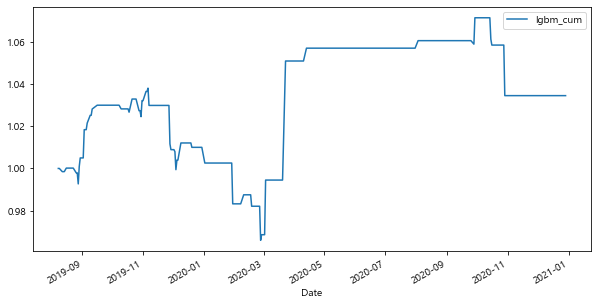

In [52]:
cum_rtn_df.plot(figsize=(10, 5))

<AxesSubplot:xlabel='Date'>

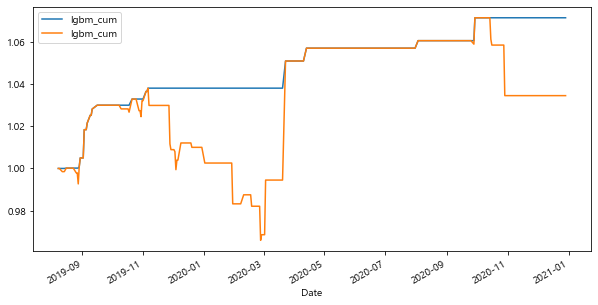

In [53]:
cummax_df = cum_rtn_df.cummax();  # 누적 고점

ax = cummax_df.plot(figsize=(10, 5))
cum_rtn_df.plot(ax=ax)

In [54]:
drawdown_df = cum_rtn_df / cummax_df - 1
drawdown_df[:10]

lgbm_cum
Date                
2019-08-08  0.000000
2019-08-09  0.000000
2019-08-12 -0.001519
2019-08-13 -0.001519
2019-08-14 -0.001519
2019-08-16  0.000000
2019-08-19  0.000000
2019-08-20  0.000000
2019-08-21  0.000000
2019-08-22  0.000000

<AxesSubplot:xlabel='Date'>

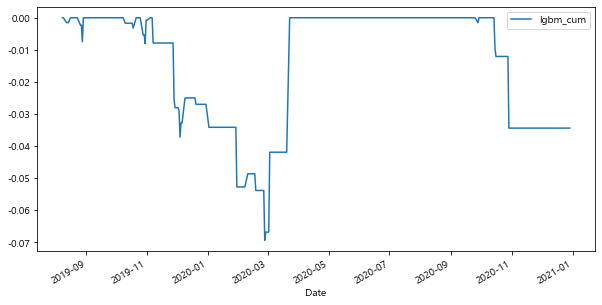

In [55]:
drawdown_df.plot(figsize=(10, 5))

In [56]:
# 최대 손실비율

mdd_series = drawdown_df.min()
mdd_series

lgbm_cum   -0.069337
dtype: float64

In [57]:
# 최대 손실기간
drawdown_df

lgbm_cum
Date                
2019-08-08  0.000000
2019-08-09  0.000000
2019-08-12 -0.001519
2019-08-13 -0.001519
2019-08-14 -0.001519
...              ...
2020-12-22 -0.034379
2020-12-23 -0.034379
2020-12-24 -0.034379
2020-12-28 -0.034379
2020-12-29 -0.034379

[344 rows x 1 columns]

In [58]:
# dataframe형식으로 boolean index를 넣으면 True 해당 데이터 => 0, False 해당 데이터=> nan
# draw down이 0이면 0, draw down이 0이 아니면 nan

max_point_df = drawdown_df[drawdown_df == 0]
max_point_df.head()

lgbm_cum
Date                
2019-08-08       0.0
2019-08-09       0.0
2019-08-12       NaN
2019-08-13       NaN
2019-08-14       NaN

In [59]:
_df = max_point_df["lgbm_cum"]
_df.tail()

Date
2020-12-22   NaN
2020-12-23   NaN
2020-12-24   NaN
2020-12-28   NaN
2020-12-29   NaN
Name: lgbm_cum, dtype: float64

In [60]:
_df.last_valid_index()  # last_valid_index() : nan이 아닌 마지막 데이터의 인덱스

Timestamp('2020-10-14 00:00:00')

In [61]:
_df.loc[drawdown_df["lgbm_cum"].last_valid_index()] = 0   # 마지막 데이터 (가장 최근데이)의 값을 0으로

In [62]:
# draw down의 기간 길이를 계산
# 얼마 동안 하락하다가 다시 전고점 대비 상승전환하였는지..
# _df.index[1:] : 다음날의 날짜 인덱스
# _df.index[:-1] : 당일의 날짜 인덱스, 길이를 맞추기 위해서 마지막 데이터를 버림

periods = _df.index[1:]-_df.index[:-1]
periods

TimedeltaIndex(['1 days', '3 days', '1 days', '1 days', '2 days', '3 days',
                '1 days', '1 days', '1 days', '1 days',
                ...
                '1 days', '1 days', '1 days', '1 days', '3 days', '1 days',
                '1 days', '1 days', '4 days', '1 days'],
               dtype='timedelta64[ns]', name='Date', length=343, freq=None)

In [63]:
# draw down이 가장 긴 기간의 순서 인덱스

max_idx = periods.argmax()
max_idx

283

In [64]:
# draw down이 가장 긴 기간

longest_days = periods.max().days
longest_days

6

In [65]:
longest_start_date = _df.index[:-1][max_idx].date()
longest_end_date = _df.index[1:][max_idx].date()

print(longest_start_date, longest_end_date)

2020-09-29 2020-10-05


In [66]:
def get_drawdown_infos(cum_returns_df): 

    cummax_df = cum_returns_df.cummax()   # 누적 전고점
    dd_df = cum_returns_df / cummax_df - 1    # 전고점 대비 하락률 - draw down
 

    mdd_series = dd_df.min()  # max draw down - 전고점 대비 가장 큰 낙폭비율


    dd_duration_info_list = list()
    max_point_df = dd_df[dd_df == 0]  # draw down이 0인 데이터만 0, 나머지는 nan값
    for col in max_point_df:
        _df = max_point_df[col]
        _df.loc[dd_df[col].last_valid_index()] = 0   # 마지막 인덱스 데이터값은 0
        
        #  draw down이 0이 아닌 데이터는 모두 삭제, draw down이 0인 데이터만 남김
        # 전고점보다 가격이 상승하는 데이터만 남김..
        _df = _df.dropna()   
        
        periods = _df.index[1:] - _df.index[:-1]  # 구간별 하락 기간의 날짜수를 계산

        days = periods.days
        max_idx = days.argmax()  # 하락이 가장 긴 기간 데이터의 인덱스

        longest_dd_period = days.max()  # 하락이 가장 긴 기간
        dd_mean = int(np.mean(days))  # 평균 하락 기간
        dd_std = int(np.std(days))    # 하락 기간의 변동성(표준편차)
        

        dd_duration_info_list.append(  # 칼럼별(종목별)로 값을 계산해서 리스트에 담는다
            [
                dd_mean,  # 평균 하락기간
                dd_std,   # 하락기간 표준편차
                longest_dd_period,  # 가장 긴 하락 기간
                
                # 가장 긴 하락기간의 시작일과 종료일
                "{} ~ {}".format(_df.index[:-1][max_idx].date(), _df.index[1:][max_idx].date())
            ]
        )

    dd_duration_info_df = pd.DataFrame(
        dd_duration_info_list,
        index=dd_df.columns,
        columns=['drawdown mean', 'drawdown std', 'longest days', 'longest period']
    )
    return dd_df, mdd_series, dd_duration_info_df

<AxesSubplot:xlabel='Date'>

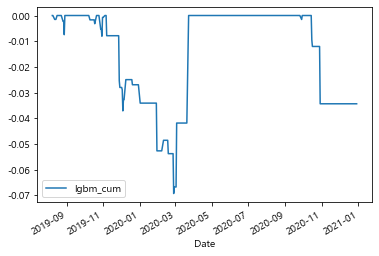

In [67]:
result = get_drawdown_infos(cum_rtn_df)
result[0].plot()

In [68]:
result[1]

lgbm_cum   -0.069337
dtype: float64

In [69]:
result[2]

drawdown mean  drawdown std  longest days           longest period
lgbm_cum              2            11           138  2019-11-06 ~ 2020-03-23

In [70]:
rtn_df = pd.read_excel('../전처리 데이터/머신러닝수익률정확도.xlsx')

In [75]:
rtn_df

적용데이터    년도    모델  수익률(%)   정확도
0   기술+일반+증권  2010  tree    2.39  0.51
1   기술+일반+증권  2017  tree    9.02  0.45
2      기술+일반  2010   rfc   -0.68  0.50
3      기술+일반  2017  tree   -1.58  0.47
4      기술+증권  2010  lgbm    6.72  0.51
5      기술+증권  2017  tree    7.70  0.48
6         기술  2010   rfc    3.45  0.51
7         기술  2017  lgbm    4.27  0.47
8      증권+일반  2010   rfc   -2.06  0.51
9      증권+일반  2017   rfc    5.20  0.50
10        증권  2010  lgbm   11.44  0.51
11        증권  2017   xgb   10.00  0.50
12        일반  2010    lr   -0.69  0.50
13        일반  2017    lr   -1.74  0.48
14     kospi  2010   베이스    5.02   NaN
15     kospi  2017   베이스   32.21   NaN